In [131]:
import cv2
from PIL import Image

In [132]:
imagePath = "test_img2.jpg"

In [1]:
from PIL import Image
im = Image.open("test_img2.jpg")
width , height = im.size
im = im.resize((int(width*5) , int(height*5)))
im.save("test_img3.jpg")

In [134]:
img = cv2.imread(imagePath)

In [135]:
# im = Image.open(imagePath)
# im = im.resize((int(width) , int(height)))
# im.save(imagePath)

In [136]:
img.shape

(1024, 768, 3)

In [137]:
gray_image = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)

In [138]:
gray_image.shape

(1024, 768)

In [139]:
face_classifier = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
)

In [140]:
face = face_classifier.detectMultiScale(
    gray_image, scaleFactor=1.001, minNeighbors=10, minSize=(10, 10)
)

In [141]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [142]:
import os
path = "results/"

In [143]:
i = 1
for (x, y, w, h) in face:
    cv2.rectangle(img_rgb, (x, y), (x + w, y + h), (0, 255, 0), 3)
    box_image = img[y-10: y+h+10 , x-10: x+w+10]
    cv2.imwrite(os.path.join(path, str(i) + ".png"), box_image)
    i+=1


# box_image = image[y : y+h, x: x+w]
# cv2.imwrite("image_name.jpg", box_image)
# cv2.imwrite(os.path.join(dest_path, f), imgcropped)

In [144]:
# for (x, y, w, h) in face:
#     cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 3)

(-0.5, 767.5, 1023.5, -0.5)

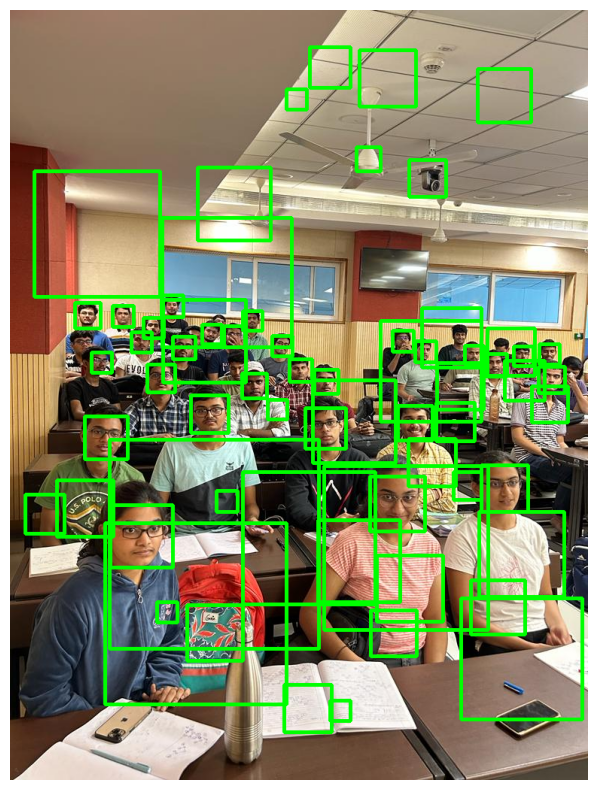

In [145]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.imshow(img_rgb)
plt.axis('off')

In [146]:
pip install facenet-pytorch

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [147]:
from facenet_pytorch import MTCNN, InceptionResnetV1
import torch
from torchvision import datasets
from torch.utils.data import DataLoader
from PIL import Image

In [148]:
mtcnn = MTCNN(image_size=240, margin=0, min_face_size=20)
resnet = InceptionResnetV1(pretrained='vggface2').eval()

dataset=datasets.ImageFolder('photos')
idx_to_class = {i:c for c,i in dataset.class_to_idx.items()}

def collate_fn(x):
    return x[0]

loader = DataLoader(dataset, collate_fn=collate_fn)

face_list = []
name_list = []
embedding_list = []

for img, idx in loader:
    face, prob = mtcnn(img, return_prob=True)
    if face is not None and prob>0.90:
        emb = resnet(face.unsqueeze(0))
        embedding_list.append(emb.detach())
        name_list.append(idx_to_class[idx])

In [149]:
data = [embedding_list, name_list]
torch.save(data, 'data.pt')

In [150]:
def face_match(img_path, data_path):

    # increasing the size of the image  
    im = Image.open(img_path)
    width , height = im.size
    im = im.resize((int(width*5) , int(height*5)))
    # im.save(img_path)

    # img = Image.open(img_path)
    img = im
    
    face, prob = mtcnn(img, return_prob=True) 
    print(type(face))
    # if type(face) == None:
    #     return [0 , 0]
    if face ==None:
        return [0,0]
    emb = resnet(face.unsqueeze(0)).detach()
    
    saved_data = torch.load('data.pt')
    embedding_list = saved_data[0] 
    name_list = saved_data[1]
    dist_list = [] 
    
    for idx, emb_db in enumerate(embedding_list):
        dist = torch.dist(emb, emb_db).item()
        dist_list.append(dist)
        
    idx_min = dist_list.index(min(dist_list))
    return (name_list[idx_min], min(dist_list))

result = face_match("results/2.png", 'data.pt')
print('Face matched with: ',result[0], 'With distance: ',result[1] ,"**************")

for file in os.listdir("results"):
    filename = os.fsdecode(file)
    result = face_match("results/" + filename, 'data.pt')
    print(filename)
    print('Face matched with: ',result[0], 'With distance: ',result[1])


<class 'torch.Tensor'>
Face matched with:  satya_narayan With distance:  1.4233559370040894 **************
<class 'torch.Tensor'>
1.png
Face matched with:  satya_narayan With distance:  1.3896217346191406
<class 'torch.Tensor'>
10.png
Face matched with:  satya_narayan With distance:  1.3483716249465942
<class 'torch.Tensor'>
11.png
Face matched with:  satya_narayan With distance:  1.3425772190093994
<class 'torch.Tensor'>
12.png
Face matched with:  manas With distance:  1.406507134437561
<class 'torch.Tensor'>
13.png
Face matched with:  satya_narayan With distance:  1.2178122997283936
<class 'torch.Tensor'>
14.png
Face matched with:  satya_narayan With distance:  1.5431430339813232
<class 'torch.Tensor'>
15.png
Face matched with:  satya_narayan With distance:  1.2522462606430054
<class 'torch.Tensor'>
16.png
Face matched with:  manas With distance:  1.3272731304168701
<class 'torch.Tensor'>
17.png
Face matched with:  satya_narayan With distance:  1.392215609550476
<class 'torch.Tensor'